# WDI Case Study
## Table of Contents
<a href="#Importing-modules"<p style="text-decoration: none;"></span></span>Importing modules</a></div>

<a href="#Welcome-to-the-case-study!"</span>01. </span>Welcome to the case study!</a></div>

<a href="#Dictionaries-for-data-science"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;1a. </span>Dictionaries for data science</a></div>

<a href="#Writing-a-function-to-help-you"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;1b. </span>Writing a function to help you</a></div>

<a href="#Using-a-list-comprehension"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;1c. </span>Using a list comprehension</a></div>

<a href="#Turning-this-all-into-a-DataFrame"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;1d. </span>Turning this all into a DataFrame</a></div>

<a href="#Using-Python-generators-for-streaming-data"</span>02. </span>Using Python generators for streaming data</a></div>

<a href="#Processing-data-in-chunks-(1)"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;2a. </span>Processing data in chunks (1)</a></div>

<a href="#Writing-a-generator-to-load-data-in-chunks-(2)"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;2b. </span>Writing a generator to load data in chunks (2)</a></div>

<a href="#Writing-a-generator-to-load-data-in-chunks-(3)"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;2c. </span>Writing a generator to load data in chunks (3)</a></div>

<a href="#Using-pandas`-read_csv-iterator-for-streaming-data"</span>03. </span>Using pandas' read_csv iterator for streaming data</a></div>

<a href="#Writing-an-iterator-to-load-data-in-chunks-(1)"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;3a. </span>Writing an iterator to load data in chunks (1)</a></div>

<a href="#Writing-an-iterator-to-load-data-in-chunks-(2)"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;3b. </span>Writing an iterator to load data in chunks (2)</a></div>

<a href="#Writing-an-iterator-to-load-data-in-chunks-(3)"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;3c. </span>Writing an iterator to load data in chunks (3)</a></div>

<a href="#Writing-an-iterator-to-load-data-in-chunks-(4)"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;3d. </span>Writing an iterator to load data in chunks (4)</a></div>

<a href="#Writing-an-iterator-to-load-data-in-chunks-(5)"<p style="text-decoration: none;"></span>&nbsp;&nbsp;&nbsp;3e. </span>Writing an iterator to load data in chunks (5)</a></div>

<a href="#Appendix:-Methods"<p style="text-decoration: none;"></span></span>Appendix: Methods</a></div>

## Importing modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Welcome to the case study!

## Dictionaries for data science

For this exercise, you'll use what you've learned about the zip() function and combine two lists into a dictionary.

These lists are actually extracted from a bigger dataset file of world development indicators from the World Bank. For pedagogical purposes, we have pre-processed this dataset into the lists that you'll be working with.

The first list feature_names contains header names of the dataset and the second list row_vals contains actual values of a row from the dataset, corresponding to each of the header names.

In [20]:
# Load the data
wdi = pd.read_csv('wdi.csv')

### Get the header data

In [21]:
feature_names = list(wdi.columns)
feature_names

['CountryName',
 'CountryCode',
 'IndicatorName',
 "IndicatorCode'",
 'Year',
 'Value']

### Get the first row data

In [22]:
# Create a list of the data in the first row of data for illustration purposes
row_vals = []
for entry in wdi.iloc[1]:
    row_vals.append(entry)

print(row_vals)

['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', 1960, 87.797601150000006]


In [17]:
# Zip lists: zipped_lists
zipped_lists = zip(feature_names, row_vals)

# Create a dictionary: rs_dict
rs_dict = dict(zipped_lists)

# Print the dictionary
print(rs_dict)

{'CountryName': 'Arab World', 'CountryCode': 'ARB', 'IndicatorName': 'Age dependency ratio (% of working-age population)', "IndicatorCode'": 'SP.POP.DPND', 'Year': 1960, 'Value': 87.797601150000006}


## Writing a function to help you

Suppose you needed to repeat the same process done in the previous exercise to many, many rows of data. Rewriting your code again and again could become very tedious, repetitive, and unmaintainable.

In this exercise, you will create a function to house the code you wrote earlier to make things easier and much more concise. Why? This way, you only need to call the function and supply the appropriate lists to create your dictionaries! Again, the lists feature_names and row_vals are preloaded and these contain the header names of the dataset and actual values of a row from the dataset, respectively.

In [8]:
# Define lists2dict()
def lists2dict(list1, list2):
    """Return a dictionary where list1 provides the keys and list2 provides the values."""

    zipped_lists = zip(list1, list2) # Create a zip object from two lists
    rs_dict = dict(zipped_lists) # create a dictionary from the zip object of the two lists
    return rs_dict
    
rs_fxn = lists2dict(feature_names, row_vals) # Call lists2dict: rs_fxn
print(rs_fxn)

{'CountryCode': 'Arab World', 'IndicatorName': 'ARB', "IndicatorCode'": 'Age dependency ratio (% of working-age population)', 'Year': 'SP.POP.DPND', 'Value': 1960}


## Using a list comprehension

This time, you're going to use the lists2dict() function you defined in the last exercise to turn a bunch of lists into a list of dictionaries with the help of a list comprehension.

The lists2dict() function has already been preloaded, together with a couple of lists, feature_names and row_lists. feature_names contains the header names of the World Bank dataset and row_lists is a list of lists, where each sublist is a list of actual values of a row from the dataset.

Your goal is to use a list comprehension to generate a list of dicts, where the keys are the header names and the values are the row entries.

Firstly, we will create a row list which is all of the rows from wdi (row_vals was only the first row of data)

In [9]:
row_lists = []
for index, row in wdi.iterrows():
    row_lists.append(list(row))

for row in row_lists[:5]: #print the first five rows for illustration purposes
    print(row)

['Arab World', 'ARB', 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'SP.ADO.TFRT', 1960, 133.5609074]
['Arab World', 'ARB', 'Age dependency ratio (% of working-age population)', 'SP.POP.DPND', 1960, 87.79760115]
['Arab World', 'ARB', 'Age dependency ratio, old (% of working-age population)', 'SP.POP.DPND.OL', 1960, 6.634579192]
['Arab World', 'ARB', 'Age dependency ratio, young (% of working-age population)', 'SP.POP.DPND.YG', 1960, 81.02332951]
['Arab World', 'ARB', 'Arms exports (SIPRI trend indicator values)', 'MS.MIL.XPRT.KD', 1960, 3000000.0]


In [10]:
list_of_dicts = [lists2dict(feature_names, sublist) for sublist in row_lists]

# Print the first two dictionaries in list_of_dicts
print(list_of_dicts[0])
print(list_of_dicts[1])

{'CountryCode': 'Arab World', 'IndicatorName': 'ARB', "IndicatorCode'": 'Adolescent fertility rate (births per 1,000 women ages 15-19)', 'Year': 'SP.ADO.TFRT', 'Value': 1960}
{'CountryCode': 'Arab World', 'IndicatorName': 'ARB', "IndicatorCode'": 'Age dependency ratio (% of working-age population)', 'Year': 'SP.POP.DPND', 'Value': 1960}


## Turning this all into a DataFrame

You've zipped lists together, created a function to house your code, and even used the function in a list comprehension to generate a list of dictionaries. That was a lot of work and you did a great job!

You will now use of all these to convert the list of dictionaries into a pandas DataFrame. You will see how convenient it is to generate a DataFrame from dictionaries with the DataFrame() function from the pandas package.

The lists2dict() function, feature_names list, and row_lists list have been preloaded for this exercise.

Go for it!

In [11]:
# Turn list of dicts into a DataFrame: df
df = pd.DataFrame(list_of_dicts)

# Print the head of the DataFrame
df.head()

,CountryCode,IndicatorCode',IndicatorName,Value,Year
0,Arab World,"Adolescent fertility rate (births per 1,000 wo...",ARB,1960,SP.ADO.TFRT
1,Arab World,Age dependency ratio (% of working-age populat...,ARB,1960,SP.POP.DPND
2,Arab World,"Age dependency ratio, old (% of working-age po...",ARB,1960,SP.POP.DPND.OL
3,Arab World,"Age dependency ratio, young (% of working-age ...",ARB,1960,SP.POP.DPND.YG
4,Arab World,Arms exports (SIPRI trend indicator values),ARB,1960,MS.MIL.XPRT.KD


# Using Python generators for streaming data

## Processing data in chunks (1)

Sometimes, data sources can be so large in size that storing the entire dataset in memory becomes too resource-intensive. In this exercise, you will process the first 1000 rows of a file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset.

The csv file 'world_dev_ind.csv' is in your current directory for your use. To begin, you need to open a connection to this file using what is known as a context manager. For example, the command with open('datacamp.csv') as datacamp binds the csv file 'datacamp.csv' as datacamp in the context manager. Here, the with statement is the context manager, and its purpose is to ensure that resources are efficiently allocated when opening a connection to a file.

If you'd like to learn more about context managers, refer to the DataCamp course on [Importing Data in Python](https://www.datacamp.com/courses/importing-data-in-python-part-1).

* [Context managers](https://docs.python.org/3/library/contextlib.html)

In [13]:
# Open a connection to the file
# This returns a dictionary with the count of entries of each item in the first column of a csv
with open('world_dev_ind.csv') as file:

    # Skip the column names - file.readline reads the current line and moves to the next one (thus skipping header here)
    file.readline()

    # Initialize an empty dictionary: counts_dict
    counts_dict = {}

    # Process only the first 1000 rows
    for j in range(1000):

        # Split the current line into a list, with separate entries separated by commas (it's a CSV)
        line = file.readline().split(',')

        # Get the value for the first column: first_col
        first_col = line[0]

        # If the column value is in the dict, increment its value
        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1

        # Else, add to the dict and set value to 1
        else:
            counts_dict[first_col] = 1

# Print the resulting dictionary
print(counts_dict)

{'Arab World': 80, 'Caribbean small states': 77, 'Central Europe and the Baltics': 71, 'East Asia & Pacific (all income levels)': 122, 'East Asia & Pacific (developing only)': 123, 'Euro area': 119, 'Europe & Central Asia (all income levels)': 109, 'Europe & Central Asia (developing only)': 89, 'European Union': 116, 'Fragile and conflict affected situations': 76, 'Heavily indebted poor countries (HIPC)': 18}


## Writing a generator to load data in chunks (2)

In the previous exercise, you processed a file line by line for a given number of lines. What if, however, you want to do this for the entire file?

In this case, it would be useful to use generators. Generators allow users to lazily evaluate data. This concept of lazy evaluation is useful when you have to deal with very large datasets because it lets you generate values in an efficient manner by yielding only chunks of data at a time instead of the whole thing at once.

In this exercise, you will define a generator function read_large_file() that produces a generator object which yields a single line from a file each time next() is called on it. The csv file 'world_dev_ind.csv' is in your current directory for your use.

Note that when you open a connection to a file, the resulting file object is already a generator! So out in the wild, you won't have to explicitly create generator objects in cases such as this. However, for pedagogical reasons, we are having you practice how to do this here with the read_large_file() function. Go for it!

In [17]:
# Define read_large_file()
def read_large_file(file_object):
    """A generator function to read a large file lazily."""
    
    # Skip the header row
    file_object.readline()

    while True: # Loop indefinitely until the end of the file (specified later in the loop)

        data = file_object.readline() # Read a line from the file: data
        if not data: # Break if this is the end of the file
            break

        yield data
        
# Open a connection to the file using a context generator
with open('world_dev_ind.csv') as file:

    # Create a generator object for the file: gen_file
    gen_file = read_large_file(file)

    # Print the first three lines of the file
    print(next(gen_file))
    print(next(gen_file))
    print(next(gen_file))

Arab World,ARB,"Adolescent fertility rate (births per 1,000 women ages 15-19)",SP.ADO.TFRT,1960,133.5609074

Arab World,ARB,Age dependency ratio (% of working-age population),SP.POP.DPND,1960,87.79760115

Arab World,ARB,"Age dependency ratio, old (% of working-age population)",SP.POP.DPND.OL,1960,6.634579192



## Writing a generator to load data in chunks (3)

Great! You've just created a generator function that you can use to help you process large files.

Now let's use your generator function to process the World Bank dataset like you did previously. You will process the file line by line, to create a dictionary of the counts of how many times each country appears in a column in the dataset. For this exercise, however, you won't process just 1000 rows of data, you'll process the entire dataset!

The generator function read_large_file() and the csv file 'world_dev_ind.csv' are preloaded and ready for your use. Go for it!

In [18]:
# Initialize an empty dictionary: counts_dict
counts_dict = {}

# Open a connection to the file
with open('world_dev_ind.csv') as file:

    # Iterate over the generator from read_large_file()
    for line in read_large_file(file):

        row = line.split(',')
        first_col = row[0]

        if first_col in counts_dict.keys():
            counts_dict[first_col] += 1
        else:
            counts_dict[first_col] = 1

print(counts_dict)


{'Arab World': 80, 'Caribbean small states': 77, 'Central Europe and the Baltics': 71, 'East Asia & Pacific (all income levels)': 122, 'East Asia & Pacific (developing only)': 123, 'Euro area': 119, 'Europe & Central Asia (all income levels)': 109, 'Europe & Central Asia (developing only)': 89, 'European Union': 116, 'Fragile and conflict affected situations': 76, 'Heavily indebted poor countries (HIPC)': 99, 'High income': 131, 'High income: nonOECD': 68, 'High income: OECD': 127, 'Latin America & Caribbean (all income levels)': 130, 'Latin America & Caribbean (developing only)': 133, 'Least developed countries: UN classification': 78, 'Low & middle income': 138, 'Low income': 80, 'Lower middle income': 126, 'Middle East & North Africa (all income levels)': 89, 'Middle East & North Africa (developing only)': 94, 'Middle income': 138, 'North America': 123, 'OECD members': 130, 'Other small states': 63, 'Pacific island small states': 66, 'Small states': 69, 'South Asia': 36}


# Using pandas' read_csv iterator for streaming data

## Writing an iterator to load data in chunks (1)

Another way to read data too large to store in memory in chunks is to read the file in as DataFrames of a certain length, say, 100. For example, with the pandas package (imported as pd), you can do pd.read_csv(filename, chunksize=100). This creates an iterable reader object, which means that you can use next() on it.

In this exercise, you will read a file in small DataFrame chunks with read_csv(). You're going to use the World Bank Indicators data 'ind_pop.csv', available in your current directory, to look at the urban population indicator for numerous countries and years.

In [21]:
# Initialize reader object: df_reader
df_reader = pd.read_csv('world_dev_ind.csv', chunksize=10)

# Print two chunks
print(next(df_reader))
print()
print(next(df_reader))

  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   
5  Arab World         ARB        Arms imports (SIPRI trend indicator values)   
6  Arab World         ARB               Birth rate, crude (per 1,000 people)   
7  Arab World         ARB                                 CO2 emissions (kt)   
8  Arab World         ARB             CO2 emissions (metric tons per capita)   
9  Arab World         ARB  CO2 emissions from gaseous fuel consumption (%...   

       IndicatorCode  Year         Value  
0        SP.ADO.TFRT  1960  1.335609e+02  
1        SP.POP.DPND  1960  8.779

## Writing an iterator to load data in chunks (2)

In the previous exercise, you used read_csv() to read in DataFrame chunks from a large dataset. In this exercise, you will read in a file using a bigger DataFrame chunk size and then process the data from the first chunk.

To process the data, you will create another DataFrame composed of only the rows from a specific country. You will then zip together two of the columns from the new DataFrame, 'Total Population' and 'Urban population (% of total)'. Finally, you will create a list of tuples from the zip object, where each tuple is composed of a value from each of the two columns mentioned.

In [30]:
# Initialize reader object: urb_pop_reader
urb_pop_reader = pd.read_csv('world_ind_pop_data.csv', chunksize=1000)

# Get the first DataFrame chunk: df_urb_pop
df_urb_pop = next(urb_pop_reader)

# Check out the head of the DataFrame
print(df_urb_pop.head())
print()

# Check out specific country: df_pop_ceb
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

# Zip DataFrame columns of interest: pops
pops = zip(df_pop_ceb['Total Population'], df_pop_ceb['Urban population (% of total)'])

# Turn zip object into list: pops_list
pops_list = list(pops)

# Print pops_list
print(pops_list)

                               CountryName CountryCode  Year  \
0                               Arab World         ARB  1960   
1                   Caribbean small states         CSS  1960   
2           Central Europe and the Baltics         CEB  1960   
3  East Asia & Pacific (all income levels)         EAS  1960   
4    East Asia & Pacific (developing only)         EAP  1960   

   Total Population  Urban population (% of total)  
0          92495902                      31.285384  
1           4190810                      31.597490  
2          91401583                      44.507921  
3        1042475394                      22.471132  
4         896492991                      16.917679  

[(91401583, 44.507921140000001), (92237118, 45.206665319999999), (93014890, 45.866564700000005), (93845749, 46.534092770000001), (94722599, 47.208742979999997)]


## Writing an iterator to load data in chunks (3)

You're getting used to reading and processing data in chunks by now. Let's push your skills a little further by adding a column to a DataFrame.

In this exercise, you will be using a list comprehension to create the values for a new column 'Total Urban Population' from the list of tuples that you generated earlier. Recall from the previous exercise that the first and second elements of each tuple consist of, respectively, values from the columns 'Total Population' and 'Urban population (% of total)'. The values in this new column 'Total Urban Population', therefore, are the product of the first and second element in each tuple. Furthermore, because the 2nd element is a percentage, you need to divide the entire result by 100, or alternatively, multiply it by 0.01.

You will also plot the data from this new column to create a visualization of the urban population data.

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


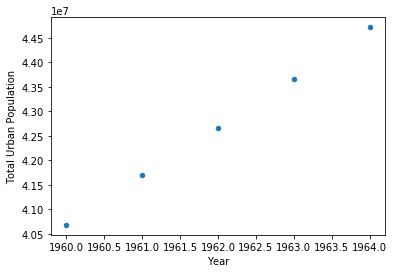

In [40]:
urb_pop_reader = pd.read_csv('world_ind_pop_data.csv', chunksize=1000)

df_urb_pop = next(urb_pop_reader)
df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']

pops = zip(df_pop_ceb['Total Population'], 
            df_pop_ceb['Urban population (% of total)'])
pops_list = list(pops)

# Use list comprehension to create new DataFrame column 'Total Urban Population'
df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1] * 0.01) for tup  in pops_list]

# Plot urban population data
df_pop_ceb.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.show()

## Writing an iterator to load data in chunks (4)

In the previous exercises, you've only processed the data from the first DataFrame chunk. This time, you will aggregate the results over all the DataFrame chunks in the dataset. This basically means you will be processing the entire dataset now. This is neat because you're going to be able to process the entire large dataset by just working on smaller pieces of it!

You're going to use the data from 'ind_pop_data.csv', available in your current directory. The packages pandas and matplotlib.pyplot have been imported as pd and plt respectively for your use.

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


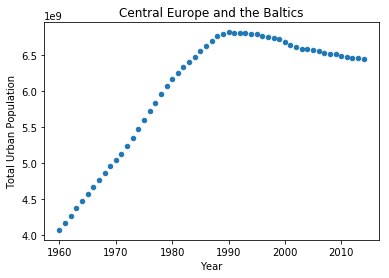

In [56]:
urb_pop_reader = pd.read_csv('world_ind_pop_data.csv', chunksize=1000)

data = pd.DataFrame()

for df_urb_pop in urb_pop_reader: # For every chunk in the reader object
    df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == 'CEB']  # Filter the country of interest
    pops = zip(df_pop_ceb['Total Population'],
                df_pop_ceb['Urban population (% of total)'])  # Zip file of our columns of interest
    pops_list = list(pops)  # List of the zip file - list of tuples of population and % urban pop
    # Create the new column by multiplying the first two
    df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]  
    data = data.append(df_pop_ceb) # each chunk (now including new column) is appended to our total dataframe

plot_title = df_pop_ceb['CountryName'].iloc[0]

# Plot urban population data
data.plot(kind='scatter', x='Year', y='Total Urban Population')
plt.title(plot_title)
plt.show()

## Writing an iterator to load data in chunks (5)

This is the last leg. You've learned a lot about processing a large dataset in chunks. In this last exercise, you will put all the code for processing the data into a single function so that you can reuse the code without having to rewrite the same things all over again.

You're going to define the function plot_pop() which takes two arguments: the filename of the file to be processed, and the country code of the rows you want to process in the dataset.

Because all of the previous code you've written in the previous exercises will be housed in plot_pop(), calling the function already does the following:

* Loading of the file chunk by chunk,
* Creating the new column of urban population values, and
* Plotting the urban population data.

That's a lot of work, but the function now makes it convenient to repeat the same process for whatever file and country code you want to process and visualize!

You're going to use the data from 'ind_pop_data.csv', available in your current directory. The packages pandas and matplotlib.pyplot has been imported as pd and plt respectively for your use.

After you are done, take a moment to look at the plots and reflect on the new skills you have acquired. The journey doesn't end here! If you have enjoyed working with this data, you can continue exploring it using the pre-processed version available on [Kaggle](https://www.kaggle.com/worldbank/world-development-indicators).

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


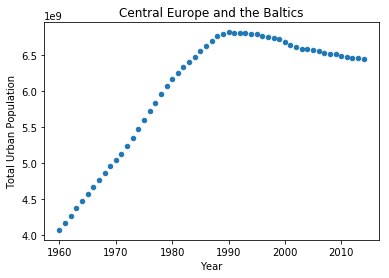

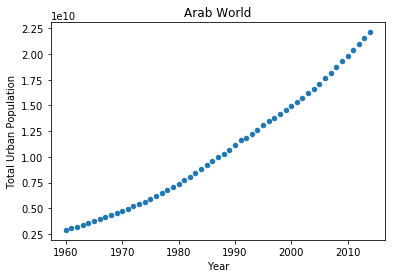

In [24]:
def plot_pop(filename, country_code):
    urb_pop_reader = pd.read_csv(filename, chunksize=1000)

    data = pd.DataFrame()
    for df_urb_pop in urb_pop_reader:
        df_pop_ceb = df_urb_pop[df_urb_pop['CountryCode'] == country_code]
        pops = zip(df_pop_ceb['Total Population'],
                   df_pop_ceb['Urban population (% of total)'])
        pops_list = list(pops)
        df_pop_ceb['Total Urban Population'] = [int(tup[0] * tup[1]) for tup in pops_list]
        data = data.append(df_pop_ceb)
        plot_title = df_pop_ceb['CountryName'].iloc[0]

    data.plot(kind='scatter', x='Year', y='Total Urban Population')
    plt.title(plot_title)
    plt.show()
    

fn = 'world_ind_pop_data.csv'

plot_pop(fn,'CEB')
plot_pop(fn,'ARB')


# Experiment
The country list and codes are defined below to allow experimentation with this function

In [29]:
w_pop = pd.read_csv('world_ind_pop_data.csv')
country_list = dict(zip(w_pop['CountryName'],w_pop['CountryCode']))
country_list

{'Afghanistan': 'AFG',
 'Albania': 'ALB',
 'Algeria': 'DZA',
 'American Samoa': 'ASM',
 'Andorra': 'ADO',
 'Angola': 'AGO',
 'Antigua and Barbuda': 'ATG',
 'Arab World': 'ARB',
 'Argentina': 'ARG',
 'Armenia': 'ARM',
 'Aruba': 'ABW',
 'Australia': 'AUS',
 'Austria': 'AUT',
 'Azerbaijan': 'AZE',
 'Bahamas, The': 'BHS',
 'Bahrain': 'BHR',
 'Bangladesh': 'BGD',
 'Barbados': 'BRB',
 'Belarus': 'BLR',
 'Belgium': 'BEL',
 'Belize': 'BLZ',
 'Benin': 'BEN',
 'Bermuda': 'BMU',
 'Bhutan': 'BTN',
 'Bolivia': 'BOL',
 'Bosnia and Herzegovina': 'BIH',
 'Botswana': 'BWA',
 'Brazil': 'BRA',
 'Brunei Darussalam': 'BRN',
 'Bulgaria': 'BGR',
 'Burkina Faso': 'BFA',
 'Burundi': 'BDI',
 'Cabo Verde': 'CPV',
 'Cambodia': 'KHM',
 'Cameroon': 'CMR',
 'Canada': 'CAN',
 'Caribbean small states': 'CSS',
 'Cayman Islands': 'CYM',
 'Central African Republic': 'CAF',
 'Central Europe and the Baltics': 'CEB',
 'Chad': 'TCD',
 'Channel Islands': 'CHI',
 'Chile': 'CHL',
 'China': 'CHN',
 'Colombia': 'COL',
 'Comoros':

C:\Users\leero\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


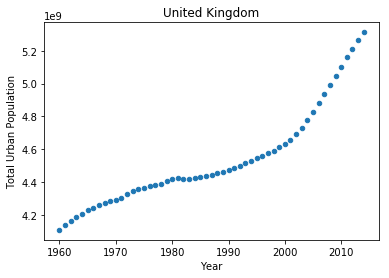

In [31]:
fn = 'world_ind_pop_data.csv'

plot_pop(fn,'GBR')


## Appendix: Methods
* [Context managers](https://docs.python.org/3/library/contextlib.html)